# Data Preparation


In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations
# modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Based on information listed below, it can be concluded as:

- There is no missing data since each variable has the same number of observations as total (2111 observations)
- Data types of each variable is correct respectively to its meaning


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Check duplication


In [5]:
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

Feature Engineering


| Variable Name                  | Description                                                                                                     |
| ------------------------------ | --------------------------------------------------------------------------------------------------------------- |
| Gender                         | Gender                                                                                                          |
| Age                            | Age                                                                                                             |
| Height                         | Height                                                                                                          |
| Weight                         | Weight                                                                                                          |
| family_history_with_overweight | Has a family member suffered or suffers from overweight?                                                        |
| FAVC                           | Do you eat high caloric food frequently?                                                                        |
| FCVC                           | Do you usually eat vegetables in your meals?                                                                    |
| NCP                            | How many main meals do you have daily?                                                                          |
| CAEC                           | Do you eat any food between meals?                                                                              |
| SMOKE                          | Do you smoke?                                                                                                   |
| CH2O                           | How much water do you drink daily?                                                                              |
| SCC                            | Do you monitor the calories you eat daily?                                                                      |
| FAF                            | How often do you have physical activity?                                                                        |
| TUE                            | How much time do you use technological devices such as cell phone, videogames, television, computer and others? |
| CALC                           | How often do you drink alcohol?                                                                                 |
| MTRANS                         | Which transportation do you usually use?                                                                        |
| NObeyesdad                     | Obesity level                                                                                                   |


Creating Features


No need for data reducing, and creating since all variables have their meanings to the analysis


Code below lists out all unique values of categorical variable. By the results, we can all the values are valid with no additional errors


In [6]:
print("Gender's unique value:", df.Gender.unique())
print("family_history_with_overweight's unique value:", df.family_history_with_overweight.unique())
print("FAVC's unique value:", df.FAVC.unique())
print("CAEC's unique value:", df.CAEC.unique())
print("SMOKE's unique value:", df.SMOKE.unique())
print("SCC's unique value:", df.SCC.unique())
print("CALC's unique value:", df.CALC.unique())
print("MTRANS's unique value:", df.MTRANS.unique())
print("NObeyesdad's unique value:", df.NObeyesdad.unique())


Gender's unique value: ['Female' 'Male']
family_history_with_overweight's unique value: ['yes' 'no']
FAVC's unique value: ['no' 'yes']
CAEC's unique value: ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE's unique value: ['no' 'yes']
SCC's unique value: ['no' 'yes']
CALC's unique value: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS's unique value: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad's unique value: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/


# Data Exploratory


## Descriptive Statistics


From the statistics summary, we can infer the findings below:


In [7]:
df.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


Before doing analysis, let's separate dataset into numeric and categorical variables for better observations


In [8]:
cat_cols=df.select_dtypes(include=['object']).columns.to_list()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Numerical Variables:
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


## EDA Univariate Analysis


### Numerical variables


Age
Skew : 1.53


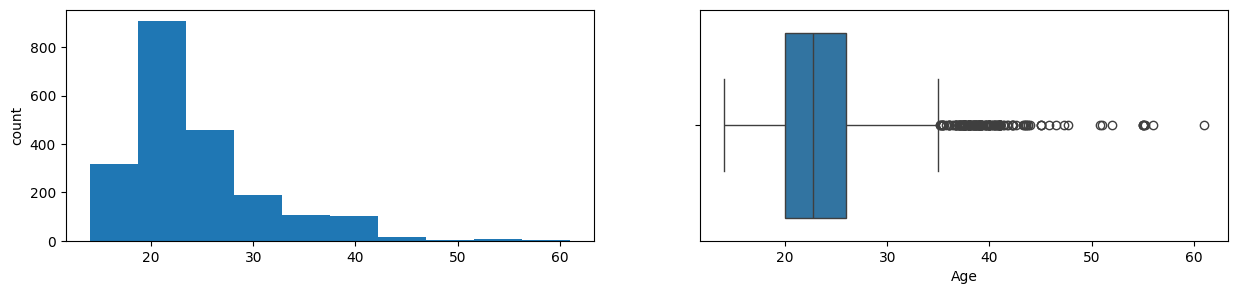

In [9]:
print('Age')
print('Skew :', round(df['Age'].skew(), 2))
plt.figure(figsize = (15, 3))
plt.subplot(1, 2, 1)
df['Age'].hist(grid=False)
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Age'])
plt.show()

Based on the graph and the descriptive statistics of Age, observations can be concluded as:

- The populations of surveyees range from 14 to 61
- However, the data is strongly right-skewed with skewness index of 1.53, which shows the survey targeted young audiences, with the mean of age 24
- The real range only accounts for the age of 35 at the upper limit, data beyond this age are so few that them can be considered outliers


Height
Skew : -0.01


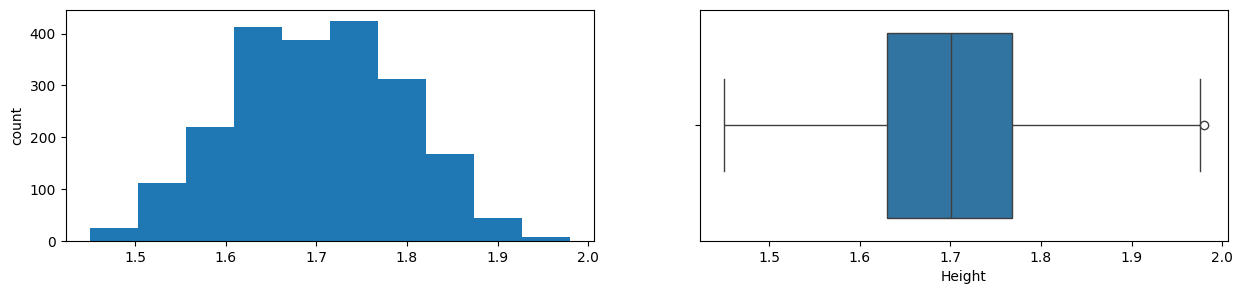

In [10]:
print('Height')
print('Skew :', round(df['Height'].skew(), 2))
plt.figure(figsize = (15, 3))
plt.subplot(1, 2, 1)
df['Height'].hist(grid=False)
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Height'])
plt.show()

Based on the graph and the descriptive statistics of Height, observations can be concluded as:

- The height populations of surveyees range from 1.45m to 1.98m
- Height is significantly normally distributed with a skewness index of -0.01
- The mean of height is around 1.7m and the only point of outlier is 1.98m


Weight
Skew : 0.26


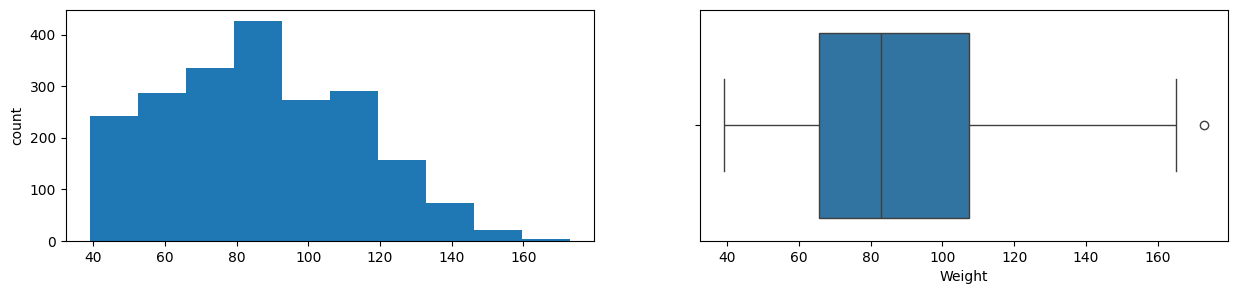

In [11]:
print('Weight')
print('Skew :', round(df['Weight'].skew(), 2))
plt.figure(figsize = (15, 3))
plt.subplot(1, 2, 1)
df['Weight'].hist(grid=False)
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Weight'])
plt.show()

Based on the graph and the descriptive statistics of Weight, observations can be concluded as:

- The weight populations of surveyees range from 39kg to 173kg
- Height is slightly right-skewed with skewness index of 0.26
- The mean of weight is around 86kg (which is fairly high for adults) and the only point of outlier is 173kg


CH2O
Skew : -0.1


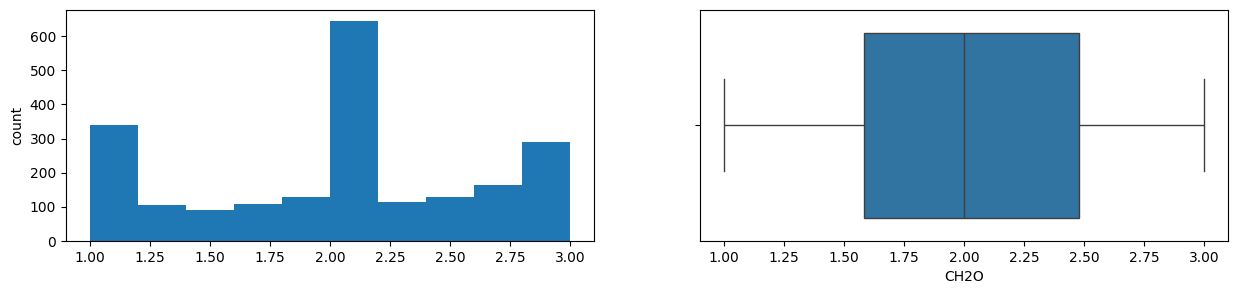

In [12]:
print('CH2O')
print('Skew :', round(df['CH2O'].skew(), 2))
plt.figure(figsize = (15, 3))
plt.subplot(1, 2, 1)
df['CH2O'].hist(grid=False)
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['CH2O'])
plt.show()

Based on the graph and the descriptive statistics of CH2O, observations can be concluded as:

- The amount of water consumed among the surveyees range from 1 litre to 3 litre
- This data is slightly symmetric with skewness index of -0.1 with no outliers
- There are more than 600 surveyees comsumed around 2 litre of water daily
- The mean of CH2O is 2 litre yet the standard deviation of 0.61 showed that data distribution is quite varied


TUE
Skew : 0.62


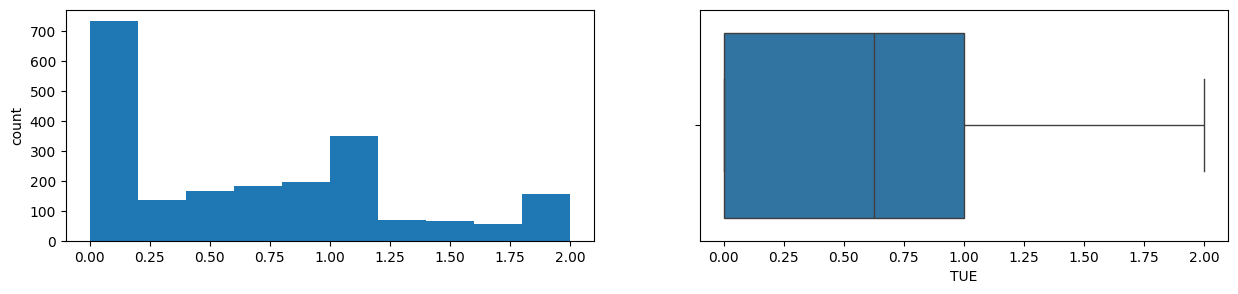

In [13]:
print('TUE')
print('Skew :', round(df['TUE'].skew(), 2))
plt.figure(figsize = (15, 3))
plt.subplot(1, 2, 1)
df['TUE'].hist(grid=False)
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['TUE'])
plt.show()

Based on the graph and the descriptive statistics of TUE, observations can be concluded as:

- The amount of time used for technological devices among the surveyees range from 0 hour to 2 hours daily
- This data is slightly right-skewed with skewness index of 0.62 with no considered outliers
- There are more than 700 surveyees don't spend time for technological devices at all


### Categorical variables


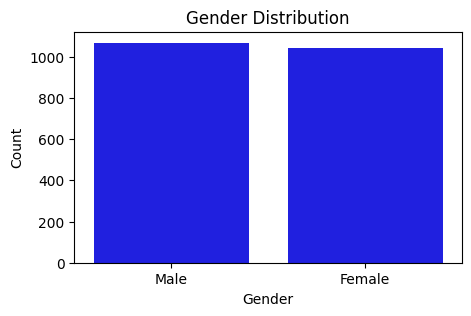

In [14]:
plt.figure(figsize=(5, 3))  # Set the figure size for a single plot
sns.countplot(x='Gender', data=df, color='blue', order=df['Gender'].value_counts().index)
plt.title('Gender Distribution') 
plt.xlabel('Gender')  
plt.ylabel('Count')  
plt.show()


Gender is selected for analysis since naturally indices (weight, height) between the 2 genders are far different and it can affect how overweight index is measured
Based on the graph and the descriptive statistics of Gender, observations can be concluded as:

- The number between each gender are rather identical, making the data symmetric between the populations


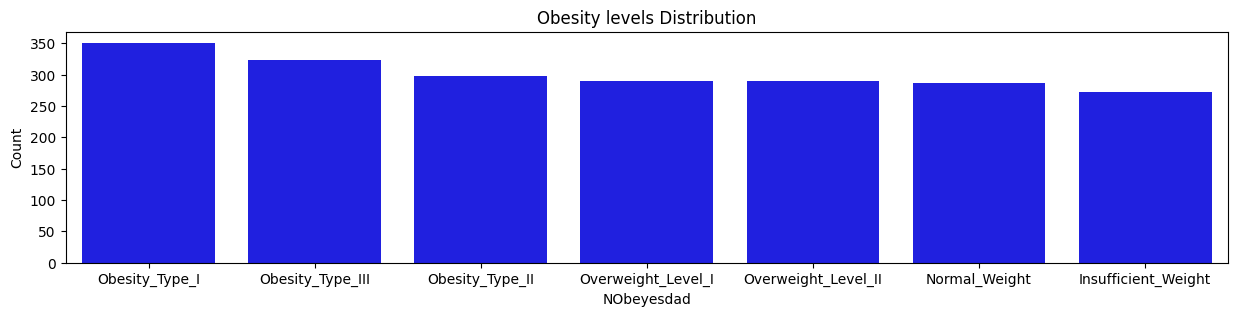

In [15]:
plt.figure(figsize=(15, 3))  # Set the figure size for a single plot
sns.countplot(x='NObeyesdad', data=df, color='blue', order=df['NObeyesdad'].value_counts().index)
plt.title('Obesity levels Distribution') 
plt.xlabel('NObeyesdad')  
plt.ylabel('Count')  
plt.show()


Obesity level is selected for analysis as it is the targeted variable of the dataset (since the survey is conducted to identify elements that affect obesity level)
Based on the graph and the descriptive statistics of NObeyesdad, observations can be concluded as:

- There are 6 classes of obesity type
- Each class's amount is rather identical to each other, proving that serveyees picking is selective based on their appearances.


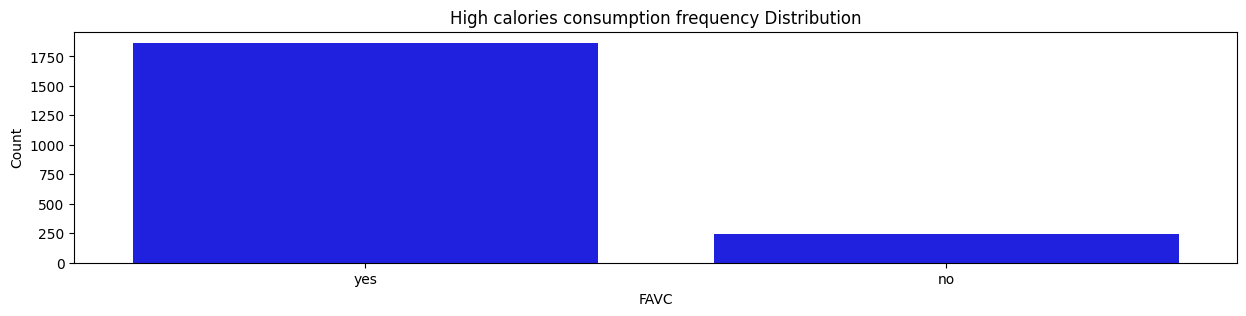

In [16]:
plt.figure(figsize=(15, 3))  # Set the figure size for a single plot
sns.countplot(x='FAVC', data=df, color='blue', order=df['FAVC'].value_counts().index)
plt.title('High calories consumption frequency Distribution') 
plt.xlabel('FAVC')  
plt.ylabel('Count')  
plt.show()


FAVC is selected for analysis as it is quite common sense to believe that High calories consumption frequency can significantly affect obesity level
Based on the graph and the descriptive statistics of FAVC, observations can be concluded as:

- The question asked for the surveyees are quite basic with only yes or no, rather than informatively asking for amount of consumption
- In overall, the distribution of data is significantly imbalanced, with the populations eating high calories accounts for close to 90% of the dataset


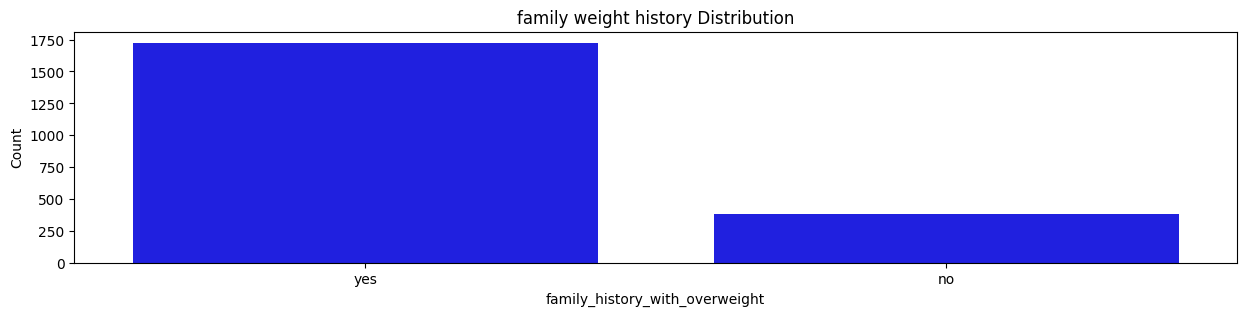

In [17]:
plt.figure(figsize=(15, 3))  # Set the figure size for a single plot
sns.countplot(x='family_history_with_overweight', data=df, color='blue', order=df['family_history_with_overweight'].value_counts().index)
plt.title('family weight history Distribution') 
plt.xlabel('family_history_with_overweight')  
plt.ylabel('Count')  
plt.show()


Family's overweight history is selected for analysis as it is quite clear that obesity level or eating habit be affected by hereditary element.
Based on the graph and the descriptive statistics of family_history_with_overweight, observations can be concluded as:

- The question asked for the surveyees are quite basic with only yes or no, rather than informatively asking for quantity or quality
- In overall, the distribution of data is significantly imbalanced, with the populations with overweight family member(s) accounts for more than 80% of the dataset


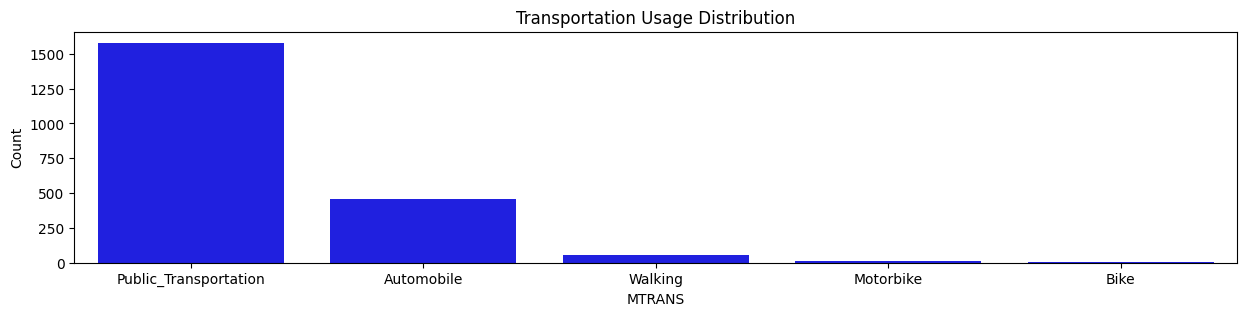

In [18]:
plt.figure(figsize=(15, 3))  # Set the figure size for a single plot
sns.countplot(x='MTRANS', data=df, color='blue', order=df['MTRANS'].value_counts().index)
plt.title('Transportation Usage Distribution') 
plt.xlabel('MTRANS')  
plt.ylabel('Count')  
plt.show()


MTRANS is selected for analysis since the choice of transportation is crucial to affect how people can regularly exercise, that can lead to obesity.
Based on the graph and the descriptive statistics of MTRANS, observations can be concluded as:

- In the questionaire, there are 5 means of transportations mentioned with 3 automatic (public transportation, automobile, and motorbike) and 2 options of physical (walking, bike)
- In overall, people tend to use automatic mean of transportation (with public transportation and automobile accounts for more than 3/4 share of the dataset) and this could be crucial factor that leads to high level of obesity


## EDA Bivariate Analysis


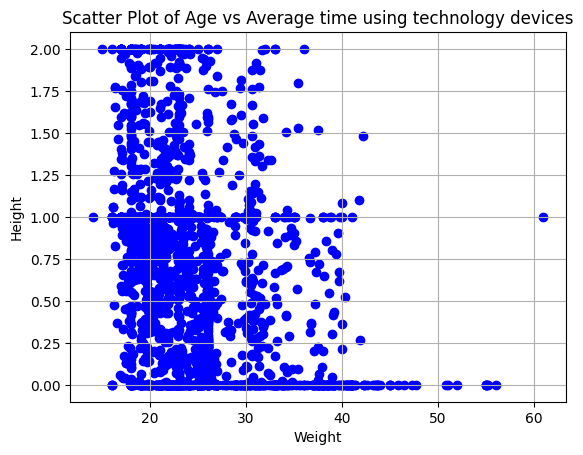

In [19]:
plt.scatter(df['Age'], df['TUE'], color='blue')
plt.title('Scatter Plot of Age vs Average time using technology devices')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.grid(True)
plt.show()

Hypothesis: People barely spend time on technology devices after 40 years of age.


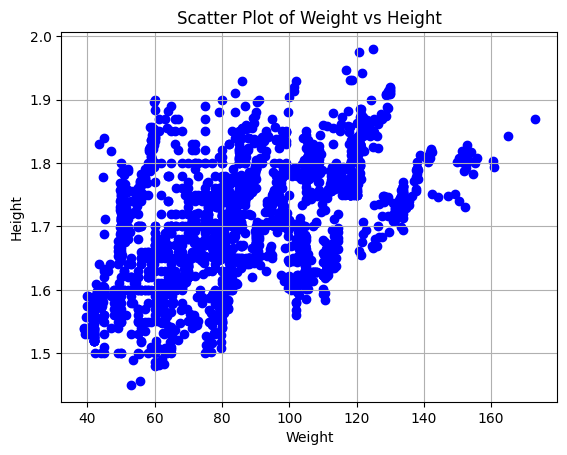

In [20]:
plt.scatter(df['Weight'], df['Height'], color='blue')
plt.title('Scatter Plot of Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.grid(True)
plt.show()

Hypothesis: The taller you are, the more you weigh


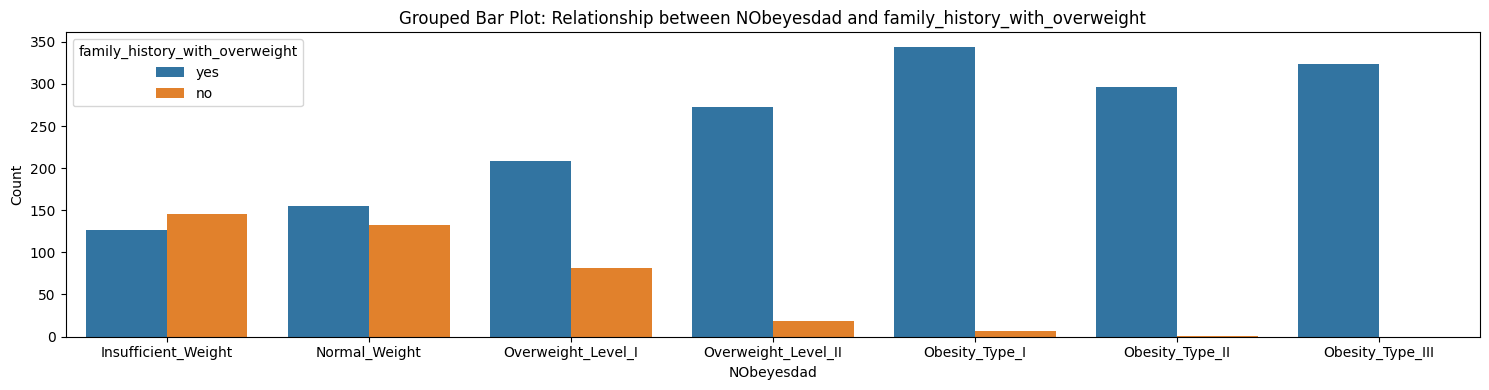

In [21]:
order_nobeyesdad = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='NObeyesdad', hue='family_history_with_overweight', order=order_nobeyesdad)
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.title('Grouped Bar Plot: Relationship between NObeyesdad and family_history_with_overweight')
plt.tight_layout()
plt.show()

Hypothesis: People who monitor their health daily are less likely to have obesity


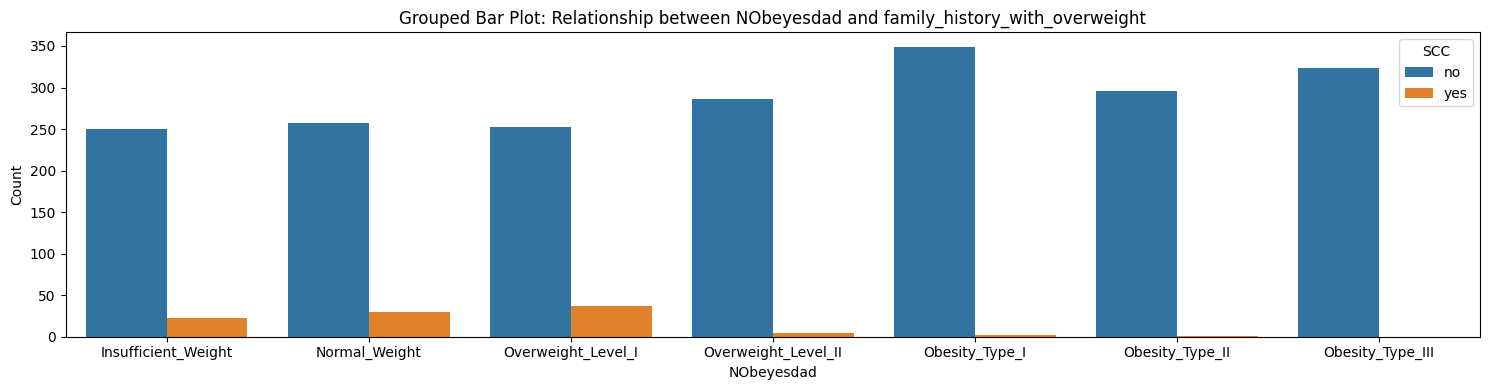

In [22]:
order_nobeyesdad = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='NObeyesdad', hue='SCC', order=order_nobeyesdad)
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.title('Grouped Bar Plot: Relationship between NObeyesdad and family_history_with_overweight')
plt.tight_layout()
plt.show()

Hypothesis: If you have no member in your family who has obesity, you have a high chance of not having obesity.


In [23]:
df['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

C:\Users\nguy7155\AppData\Local\Temp\ipykernel_12756\2402841050.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Height', data=df, palette='Set2')


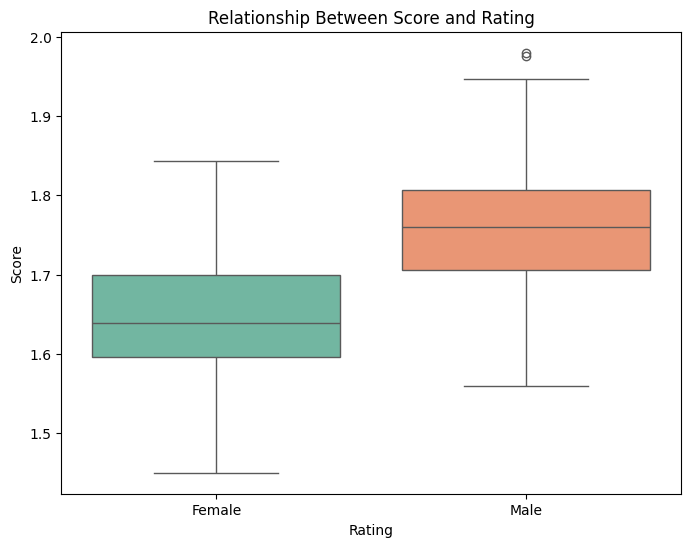

In [24]:
# rating_order = ['Low', 'Medium', 'High']
# df['Rating'] = pd.Categorical(df['Rating'], categories=rating_order, ordered=True), order=rating_order
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Height', data=df, palette='Set2')
# Title and labels
plt.title('Relationship Between Score and Rating')
plt.xlabel('Rating')
plt.ylabel('Score')
# Show the plot
plt.show()

Hypothesis: In overall, male are taller than female


C:\Users\nguy7155\AppData\Local\Temp\ipykernel_12756\3701119497.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='family_history_with_overweight', y='Height', data=df, palette='Set2')


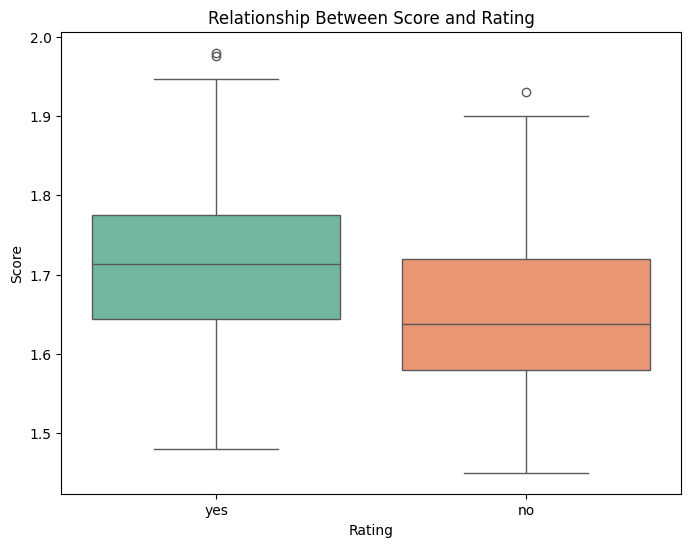

In [25]:
# rating_order = ['Low', 'Medium', 'High']
# df['Rating'] = pd.Categorical(df['Rating'], categories=rating_order, ordered=True), order=rating_order
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='family_history_with_overweight', y='Height', data=df, palette='Set2')
# Title and labels
plt.title('Relationship Between Score and Rating')
plt.xlabel('Rating')
plt.ylabel('Score')
# Show the plot
plt.show()

Hypothesis: In overall, people with family members who have overweight history are taller than who don't


C:\Users\nguy7155\AppData\Local\Temp\ipykernel_12756\2095034257.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='family_history_with_overweight', y='Weight', data=df, palette='Set2')


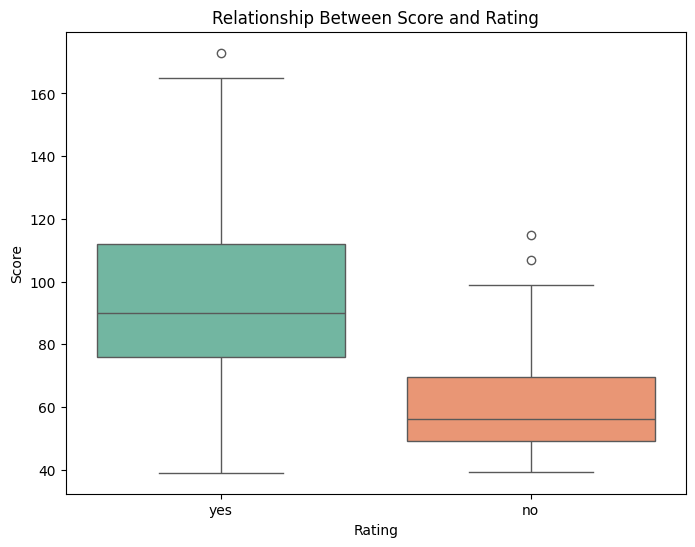

In [26]:
# rating_order = ['Low', 'Medium', 'High']
# df['Rating'] = pd.Categorical(df['Rating'], categories=rating_order, ordered=True), order=rating_order
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='family_history_with_overweight', y='Weight', data=df, palette='Set2')
# Title and labels
plt.title('Relationship Between Score and Rating')
plt.xlabel('Rating')
plt.ylabel('Score')
# Show the plot
plt.show()

Hypothesis: In overall, people with family members who have overweight history are heavier than who don't


C:\Users\nguy7155\AppData\Local\Temp\ipykernel_12756\3089212078.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='FCVC', data=df, palette='Set2')


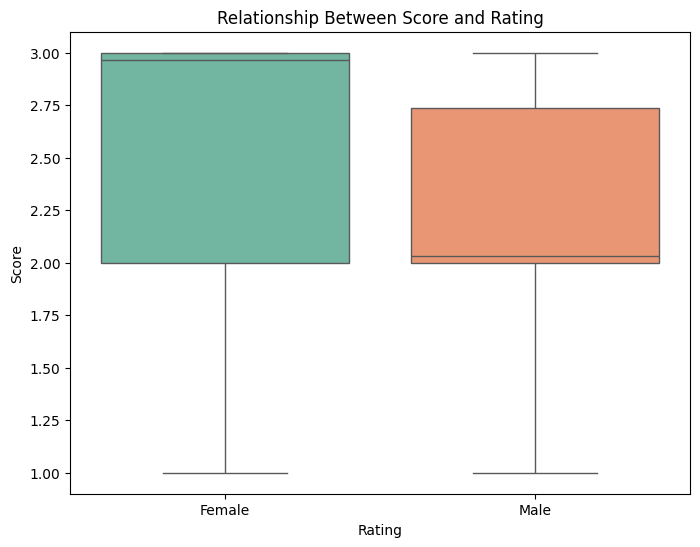

In [27]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='FCVC', data=df, palette='Set2')
# Title and labels
plt.title('Relationship Between Score and Rating')
plt.xlabel('Rating')
plt.ylabel('Score')
# Show the plot
plt.show()

Hypothesis: In overall, Female eat vegetables more oftern than male


C:\Users\nguy7155\AppData\Local\Temp\ipykernel_12756\4252569818.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y='CH2O', data=df, order=order_nobeyesdad, palette='Set2')


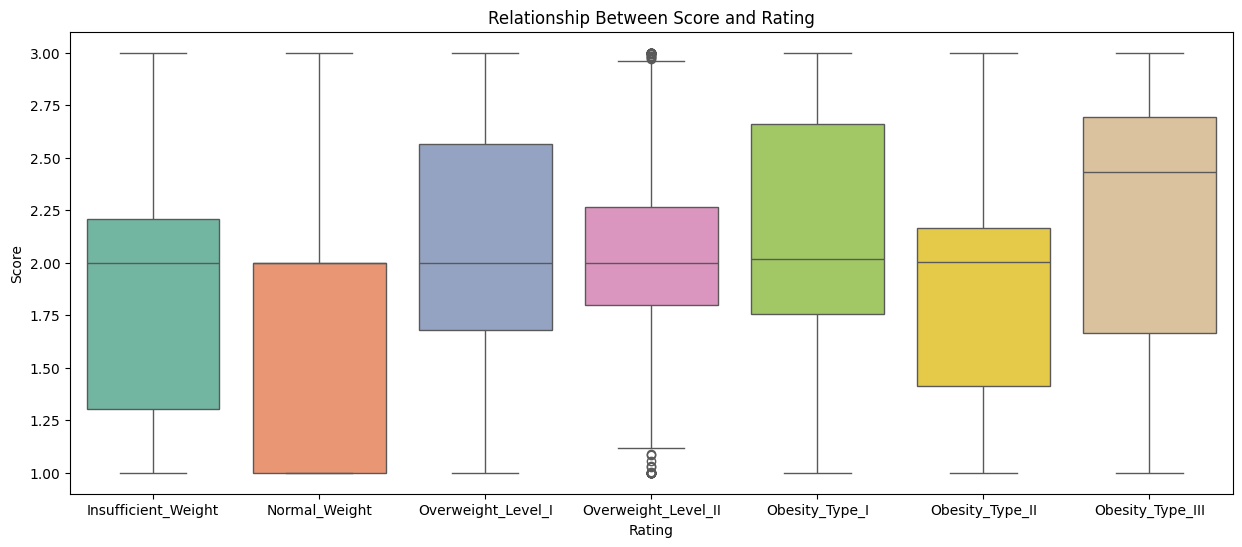

In [28]:
order_nobeyesdad = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
df['NObeyesdad'] = pd.Categorical(df['NObeyesdad'], categories=order_nobeyesdad, ordered=True)
# Create the boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(x='NObeyesdad', y='CH2O', data=df, order=order_nobeyesdad, palette='Set2')
# Title and labels
plt.title('Relationship Between Score and Rating')
plt.xlabel('Rating')
plt.ylabel('Score')
# Show the plot
plt.show()

Hypothesis: People with normal weight or below usually drink less water


C:\Users\nguy7155\AppData\Local\Temp\ipykernel_12756\4151350191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='family_history_with_overweight', y='CH2O', data=df, palette='Set2')


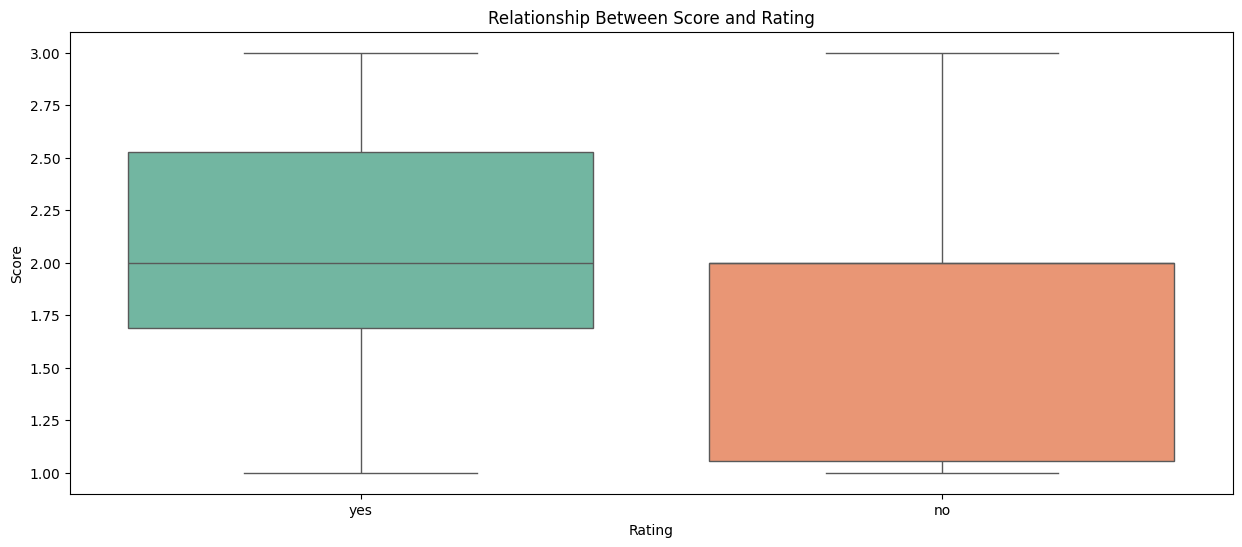

In [29]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='family_history_with_overweight', y='CH2O', data=df, palette='Set2')
# Title and labels
plt.title('Relationship Between Score and Rating')
plt.xlabel('Rating')
plt.ylabel('Score')
# Show the plot
plt.show()

Hypothesis: In overall, people with family members who have overweight history drink more water than who don't


# Data Modelling


## Features analysis


Calculating Mass Body Index based on equation https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub to transform NObeyesdad to numeric value for analysis


In [31]:
# Calculate the Mass Body Index (MBI) as Weight / (Height^2)
df['Mass_body_index'] = df['Weight'] / (df['Height'] ** 2)

In [32]:
cat_cols=df.select_dtypes(include=['object','category']).columns.to_list()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Numerical Variables:
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Mass_body_index']


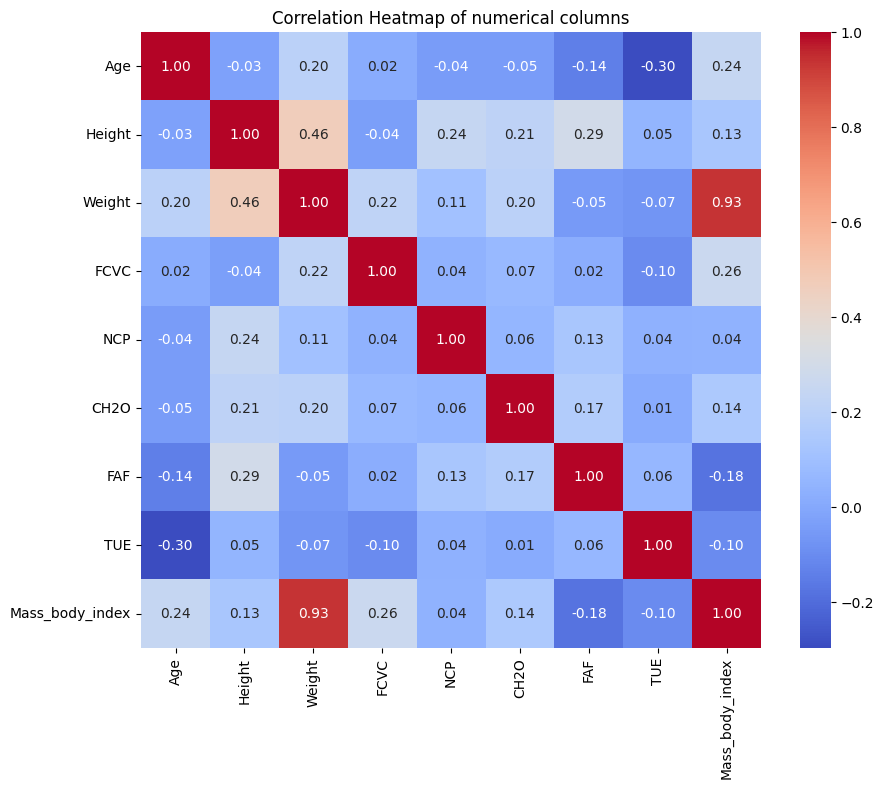

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of numerical columns')
plt.show()

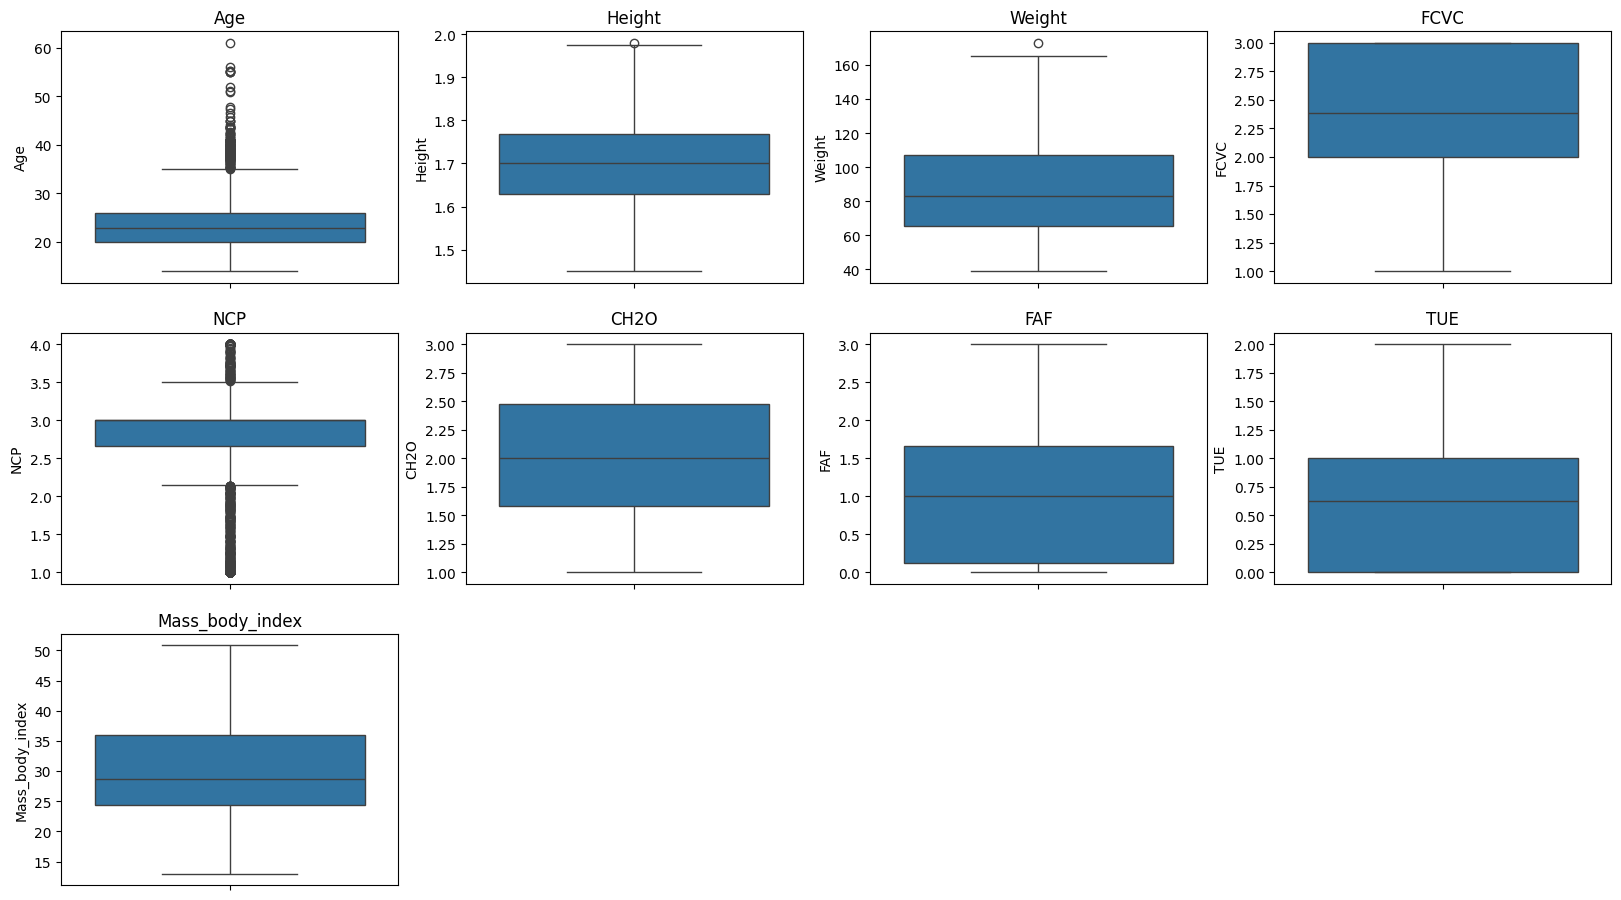

In [34]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)

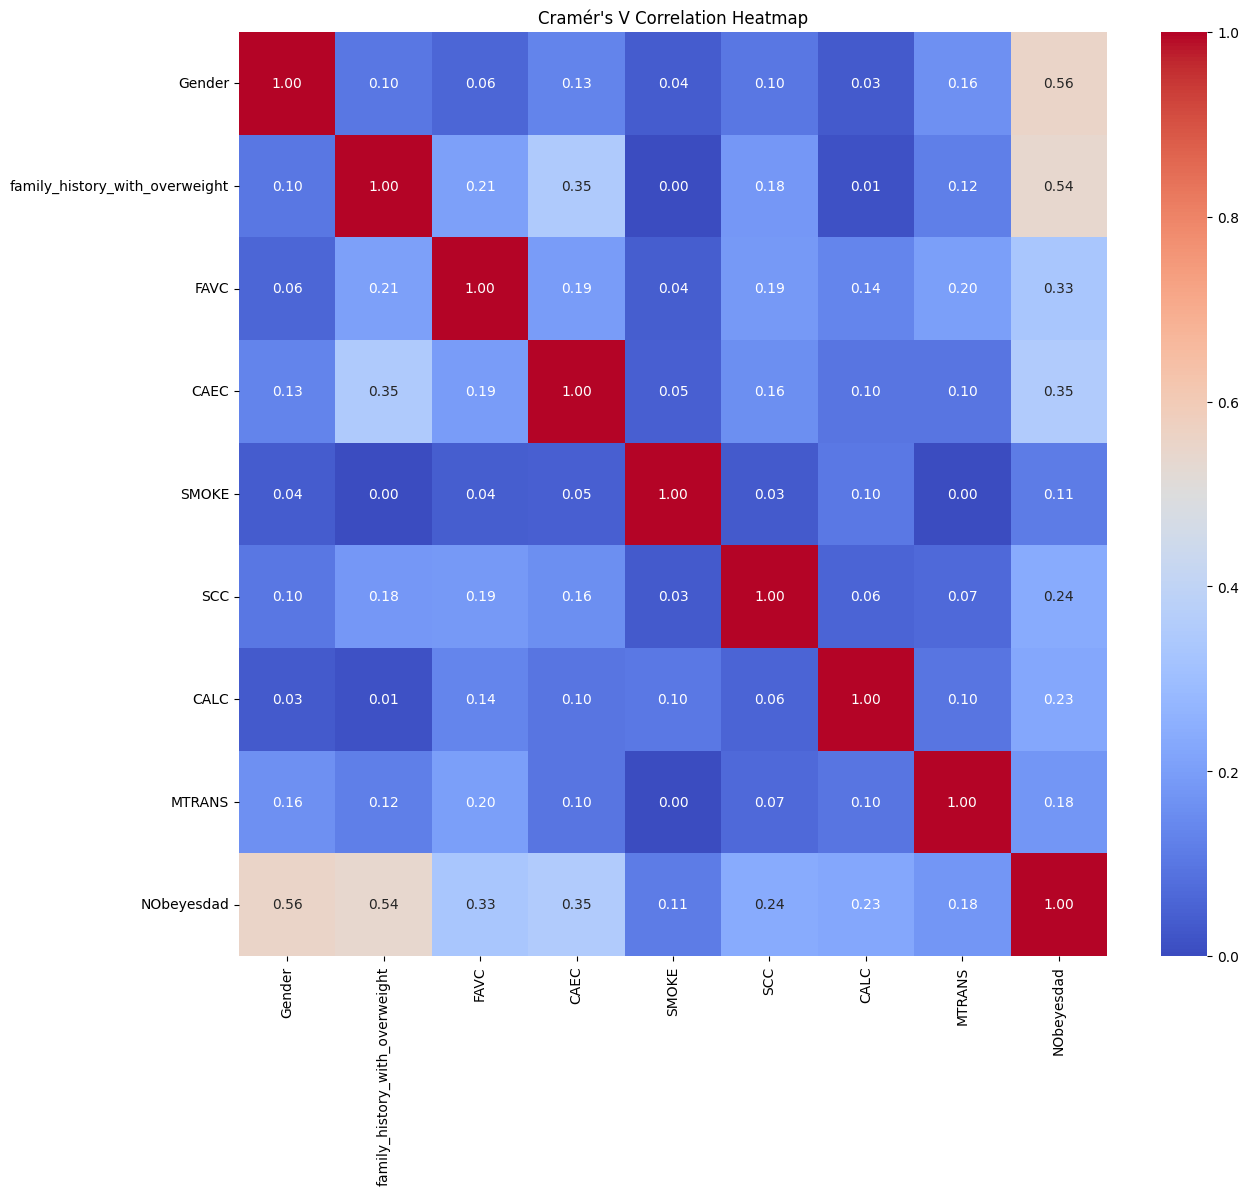

In [35]:
# Calculate the Cramér’s V and correlation matrix
assoc = associations(df[cat_cols], nominal_columns='all', plot=False)
corr_matrix = assoc['corr']

# Plot the heatmap with correlation values in each block
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Cramér's V Correlation Heatmap")
plt.show()


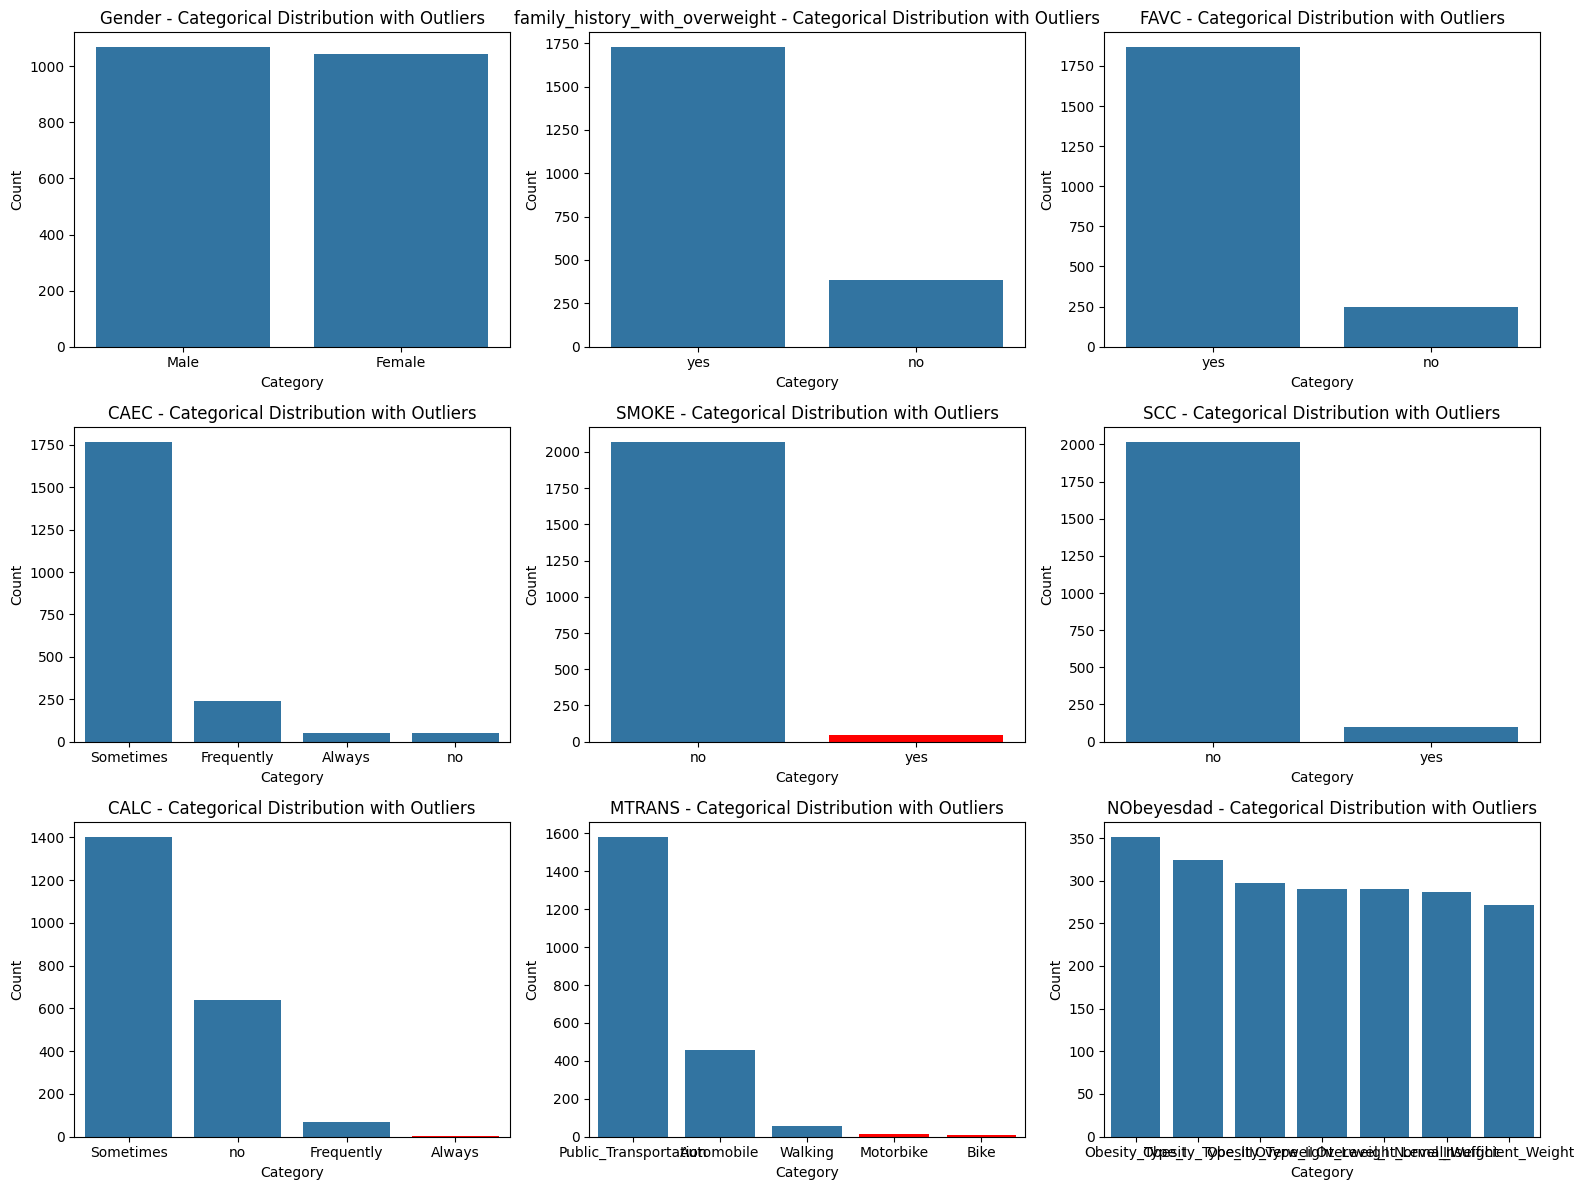

In [36]:
# Set the threshold for outliers (low-frequency categories)
threshold = 50

# Set up the figure for multiple subplots
plt.figure(figsize=(16, 12))

# Loop through each categorical column to plot countplots
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i) 
    category_counts = df[col].value_counts()

    # Countplot for the categorical column
    sns.countplot(x=col, data=df, order=category_counts.index)


    outliers = category_counts[category_counts < threshold]
    for label in outliers.index:
        plt.gca().patches[category_counts.index.get_loc(label)].set_facecolor('red')

    # Add title and labels for each subplot
    plt.title(f'{col} - Categorical Distribution with Outliers')
    plt.xlabel('Category')
    plt.ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()


## Classification Problem


### Features selection


#### Numerical features


In [37]:
target = 'Mass_body_index'
num_features = df[num_cols].columns.drop(target)

# # Calculate correlations
# correlations = df[num_features].corrwith(df[target])

# # Set a threshold for feature selection
# threshold = 0.3
# selected_num_features = correlations[abs(correlations) > threshold].index.tolist()

#### Categorical features


In [38]:
categorical_target = 'NObeyesdad'

cat_features = df[cat_cols].columns.drop(categorical_target)

# assoc = associations(df[cat_cols], nominal_columns='all', plot=False)
# corr_matrix = assoc['corr']

# threshold = 0.3
# selected_cat_features = corr_matrix[corr_matrix.loc[categorical_target] > threshold ].index.tolist()

# del selected_cat_features[-1]

#### Final features


In [39]:
selected_features = []
selected_features.extend(num_features)
selected_features.extend(cat_features)

print(selected_features)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [40]:
label_encoder = LabelEncoder()
for col in cat_cols:
    if df[col].dtype == 'object':  # Check if the column contains non-numeric data
        df[col] = label_encoder.fit_transform(df[col])

X = df[selected_features] 
y = df[categorical_target]  # Target variable 'NObeyesdad'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [41]:
df[categorical_target].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   int64   
 1   Age                             2111 non-null   float64 
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   int64   
 5   FAVC                            2111 non-null   int64   
 6   FCVC                            2111 non-null   float64 
 7   NCP                             2111 non-null   float64 
 8   CAEC                            2111 non-null   int64   
 9   SMOKE                           2111 non-null   int64   
 10  CH2O                            2111 non-null   float64 
 11  SCC                             2111 non-null   int64   
 12  FAF                 

### K-nearest neighbors (KNN)


Accuracy: 0.8723
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.79      0.96      0.87        56
      Normal_Weight       0.78      0.45      0.57        62
     Obesity_Type_I       0.90      0.96      0.93        78
    Obesity_Type_II       0.98      0.97      0.97        58
   Obesity_Type_III       0.97      1.00      0.98        63
 Overweight_Level_I       0.76      0.86      0.81        56
Overweight_Level_II       0.88      0.90      0.89        50

           accuracy                           0.87       423
          macro avg       0.87      0.87      0.86       423
       weighted avg       0.87      0.87      0.86       423

Confusion Matrix:


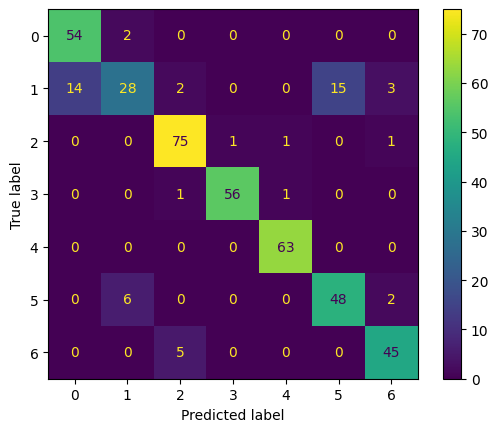

In [43]:
# Initialize the KNN classifier with 7 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix) 
disp.plot() 
plt.show()


### Support Vector Machine (SVM)


Accuracy: 0.8865
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.85      1.00      0.92        56
      Normal_Weight       0.93      0.65      0.76        62
     Obesity_Type_I       0.92      0.94      0.93        78
    Obesity_Type_II       0.94      1.00      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.75      0.88      0.81        56
Overweight_Level_II       0.80      0.72      0.76        50

           accuracy                           0.89       423
          macro avg       0.88      0.88      0.88       423
       weighted avg       0.89      0.89      0.88       423

Confusion Matrix:


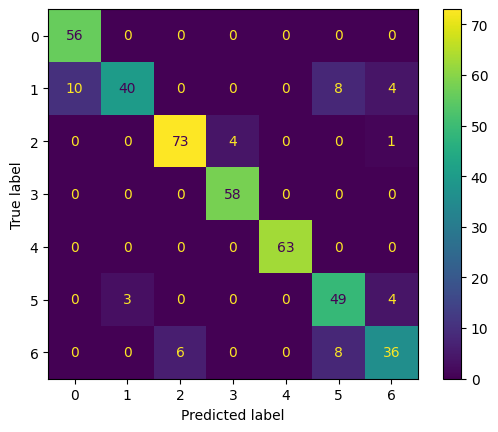

In [44]:
# Initialize the SVM classifier (Support Vector Classifier)
svm = SVC(kernel='linear', random_state=42)  # You can use 'linear', 'rbf', or other kernels

# Fit the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix) 
disp.plot() 
plt.show()


## Regression Problem


### Features selection

#### Numerical features


In [72]:
target = 'Mass_body_index'
num_features = df[num_cols].columns.drop(target)

# # Calculate correlations
# correlations = df[num_features].corrwith(df[target])

# # Set a threshold for feature selection
# threshold = 0.3
# selected_num_features = correlations[abs(correlations) > threshold].index.tolist()

#### Categorical features


In [73]:
categorical_target = 'NObeyesdad'

cat_features = df[cat_cols].columns.drop(categorical_target)

# assoc = associations(df[cat_cols], nominal_columns='all', plot=False)
# corr_matrix = assoc['corr']

# threshold = 0.3
# selected_cat_features = corr_matrix[corr_matrix.loc[categorical_target] > threshold ].index.tolist()

# del selected_cat_features[-1]

#### Final features


In [74]:
selected_features = []
selected_features.extend(num_features)
selected_features.extend(cat_features)

print(selected_features)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [75]:
label_encoder = LabelEncoder()
for col in cat_cols:
    if df[col].dtype == 'object':  # Check if the column contains non-numeric data
        df[col] = label_encoder.fit_transform(df[col])

X = df[selected_features] 
y = df[target]  # Target variable 'Mass_body_index'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Multiple Linear Regression (MLR) - Linear

In [66]:
# Create the Linear Regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Output the metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 0.5900495869266992
Root Mean Squared Error (RMSE): 0.7681468524486051
R-squared (R²): 0.99106745500846


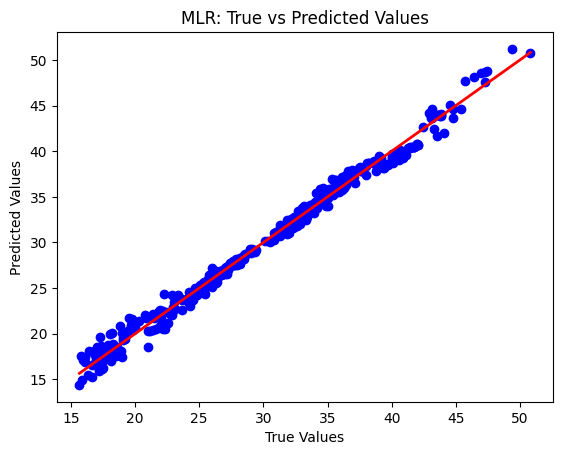

In [67]:
# Plot results
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('MLR: True vs Predicted Values')
plt.show()


### Support Vector Regression (SVR)

In [68]:
# Feature Scaling: SVR requires feature scaling for better performance
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale features
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Create and train the SVR model
svr = SVR(kernel='rbf')  # 'rbf' kernel is the most common
svr.fit(X_train_scaled, y_train_scaled.ravel())  # .ravel() to flatten y_train_scaled

# Make predictions
y_pred_scaled = svr.predict(X_test_scaled)

# Inverse scaling to get the predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test = scaler_y.inverse_transform(y_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Output the metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 1.238158810758084
Root Mean Squared Error (RMSE): 1.1127258470791825
R-squared (R²): 0.9812559663987324


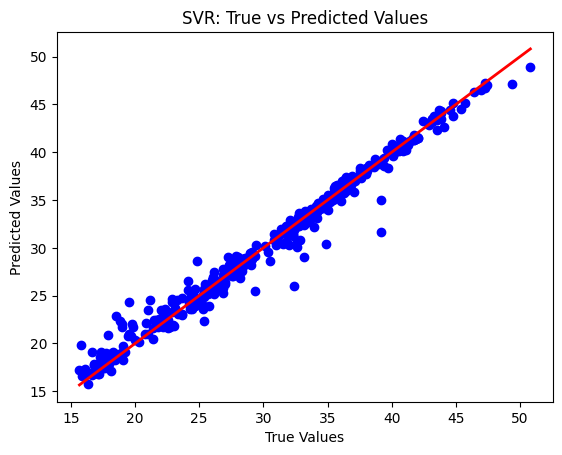

In [69]:
# Plot results
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('SVR: True vs Predicted Values')
plt.show()


### Polynomial Regression

In [77]:
poly = PolynomialFeatures(degree=2)  # Degree of the polynomial (2 = quadratic)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Step 2: Train the Linear Regression Model on Polynomial Features
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Step 3: Make Predictions
y_pred = model.predict(X_poly_test)

# Step 4: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)



Mean Squared Error (MSE): 0.0038359792794039928
Root Mean Squared Error (RMSE): 0.0619352829928466
R-squared (R²): 0.9999419285120114


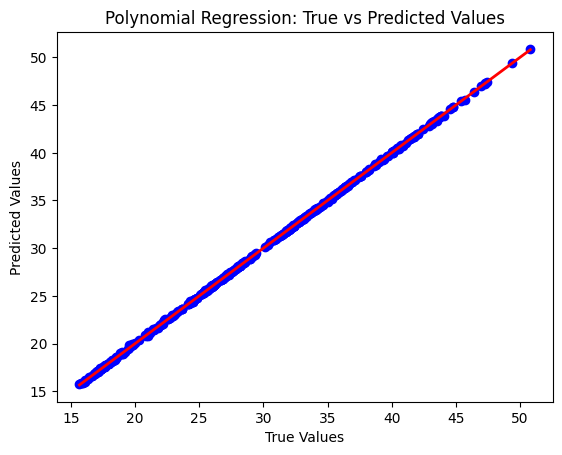

In [83]:
# Plot results
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression: True vs Predicted Values')
plt.show()
